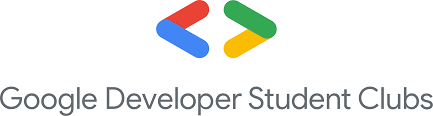

### Application de Premiere Workshop
#### ISSAM SALMI

In [6]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import plotly.express as px

In [7]:
data = pd.read_csv('Advertising.csv')
data.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* Clicked on Ad': 0 or 1 indicated clicking on Ad

In [8]:
# Speed Analyst on Dataset

In [9]:
data.describe()

Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%              218.792500     1.000000        1.00000  
max              269.960000     1.000000        1.00000

In [10]:
data.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [11]:
data.duplicated().sum()

0

In [12]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

## 1 - EDA

#### Age Distrubition

In [13]:
import warnings; warnings.filterwarnings('ignore')
fig = px.histogram(data, x = 'Age', title='Distribution de l\'âge')
fig.show()

#### What is the percentage of men and women among consumers?

In [14]:
df  = data.copy()
df['MaleVsFemale'] = df['Male'].map({1 : 'Male', 0 : 'Female'})

In [16]:
# df.groupby(['Month', 'MaleVsFemale'], as_index=False)['Daily Time Spent on Site'].sum().reset_index()

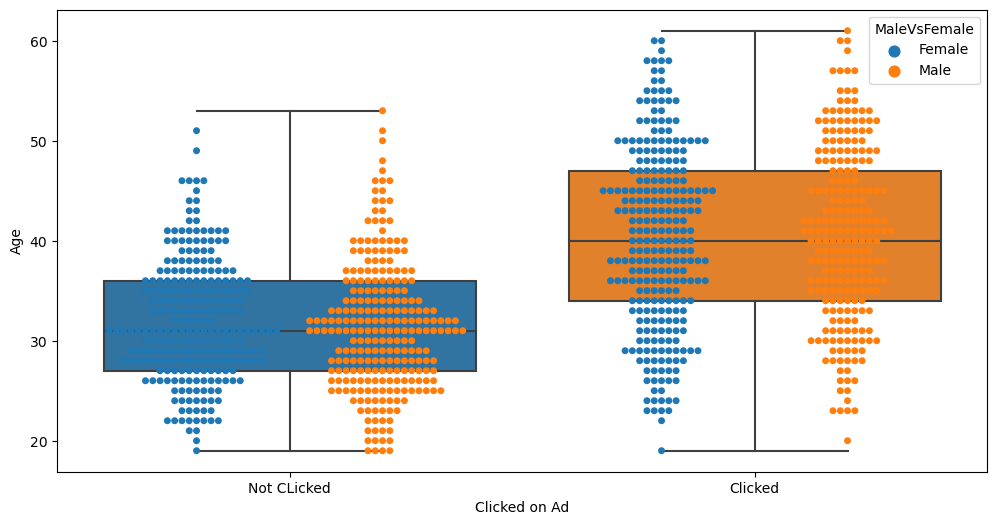

In [17]:
plt.figure(figsize=(12, 6))
sns.swarmplot(x = df['Clicked on Ad'], y = df['Age'], hue = df['MaleVsFemale'], dodge=True)
sns.boxplot(x = df['Clicked on Ad'], y = df['Age'], whis=np.inf)
plt.xticks(ticks=[0, 1], labels=['Not CLicked','Clicked'])
plt.show()

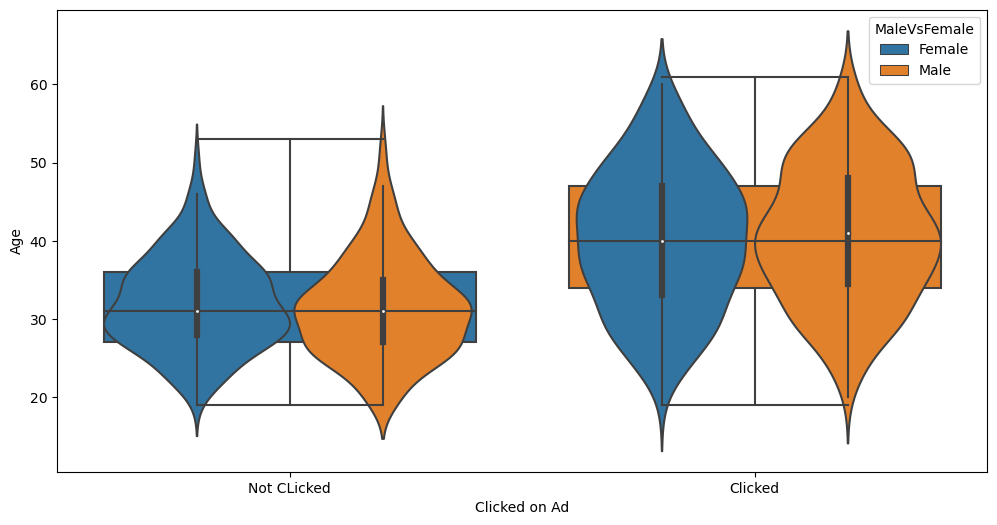

In [18]:
plt.figure(figsize=(12, 6))
sns.violinplot(x = df['Clicked on Ad'], y = df['Age'], hue = df['MaleVsFemale'])
sns.boxplot(x = df['Clicked on Ad'], y = df['Age'], whis=np.inf)
plt.xticks(ticks=[0, 1], labels=['Not CLicked','Clicked'])
plt.show()

In [19]:
fig = px.histogram(df, x = 'MaleVsFemale', color='MaleVsFemale')
fig.show()

* the pourcentage of Female is not greather so much than Male

<AxesSubplot:xlabel='MaleVsFemale', ylabel='count'>

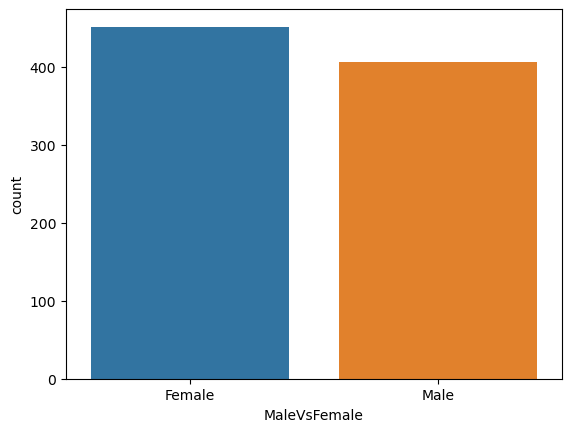

In [20]:
concenhum = df[(df['Age'] >=25) & (df['Age'] <= 50)]['MaleVsFemale']
sns.countplot(x = concenhum)

#### Which countries are most represented in the dataset?

In [21]:
df['Country'].value_counts()[0:25]

France                    9
Czech Republic            9
Peru                      8
Turkey                    8
Greece                    8
Senegal                   8
Liberia                   8
Australia                 8
South Africa              8
Micronesia                8
Cyprus                    8
Afghanistan               8
Taiwan                    7
Cambodia                  7
Luxembourg                7
Eritrea                   7
Fiji                      7
Burundi                   7
Venezuela                 7
Bahamas                   7
Ethiopia                  7
Western Sahara            7
Albania                   7
Bosnia and Herzegovina    7
Croatia                   6
Name: Country, dtype: int64

#### How is the average daily time spent on the site distributed among consumers?

<AxesSubplot:ylabel='Density'>

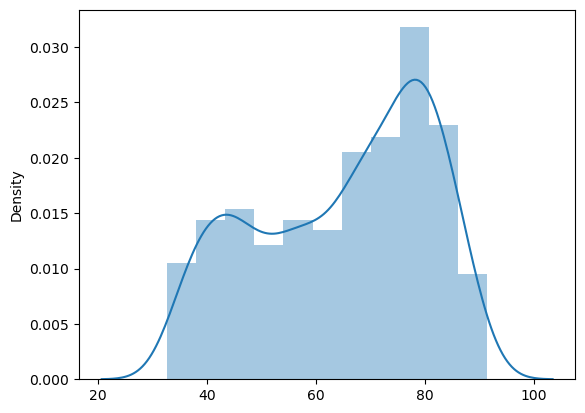

In [22]:
sns.distplot(x = df['Daily Time Spent on Site'])

<AxesSubplot:xlabel='Age', ylabel='Daily Time Spent on Site'>

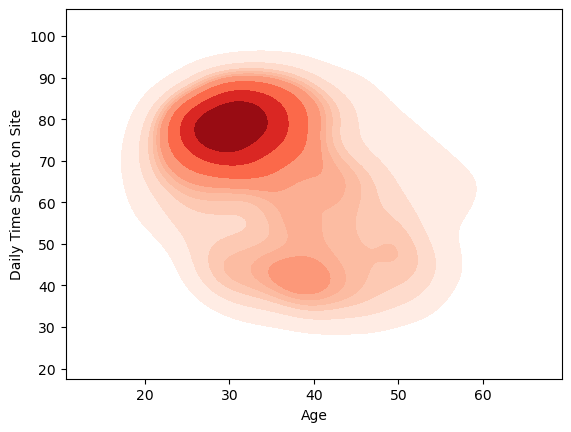

In [23]:
sns.kdeplot(y = df['Daily Time Spent on Site'],x =  df['Age'], cmap="Reds", shade=True, shade_lowest=False)

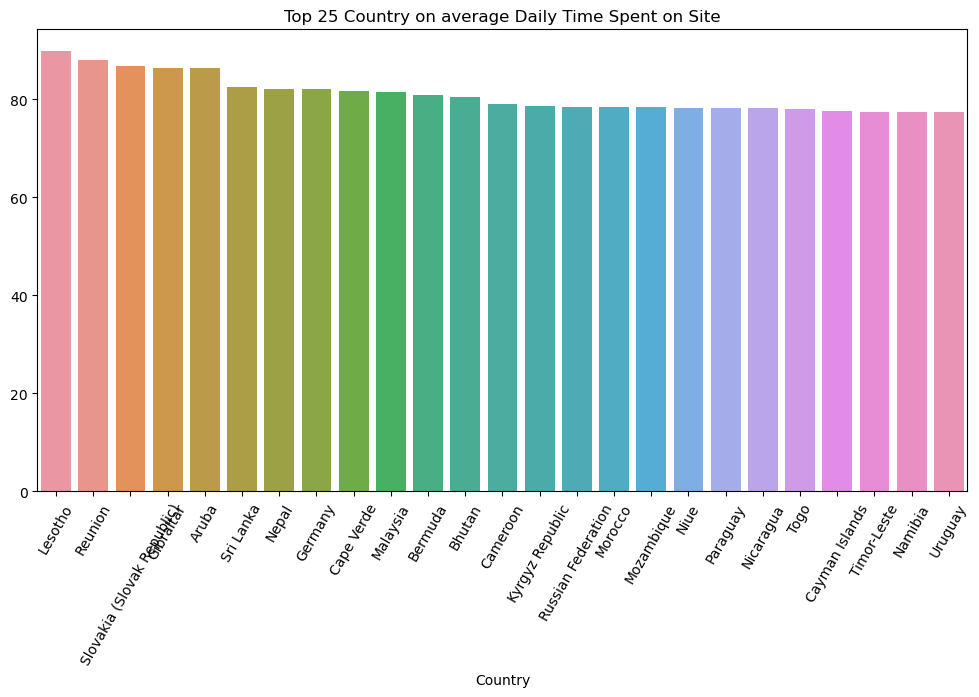

In [24]:
plt.figure(figsize=(12, 6))
xx = df.groupby('Country')['Daily Time Spent on Site'].mean().sort_values(ascending=False )[0:25]
sns.barplot(y = xx.values, x = xx.index)
plt.title('Top 25 Country on average Daily Time Spent on Site')
plt.xticks(rotation = 60)
plt.show()

In [25]:
xx = df.groupby('Country')['Daily Time Spent on Site'].mean().sort_values(ascending=False ).reset_index()[0:25]
fig = px.bar(xx, x = 'Country', y = 'Daily Time Spent on Site', color='Daily Time Spent on Site')
fig.show()

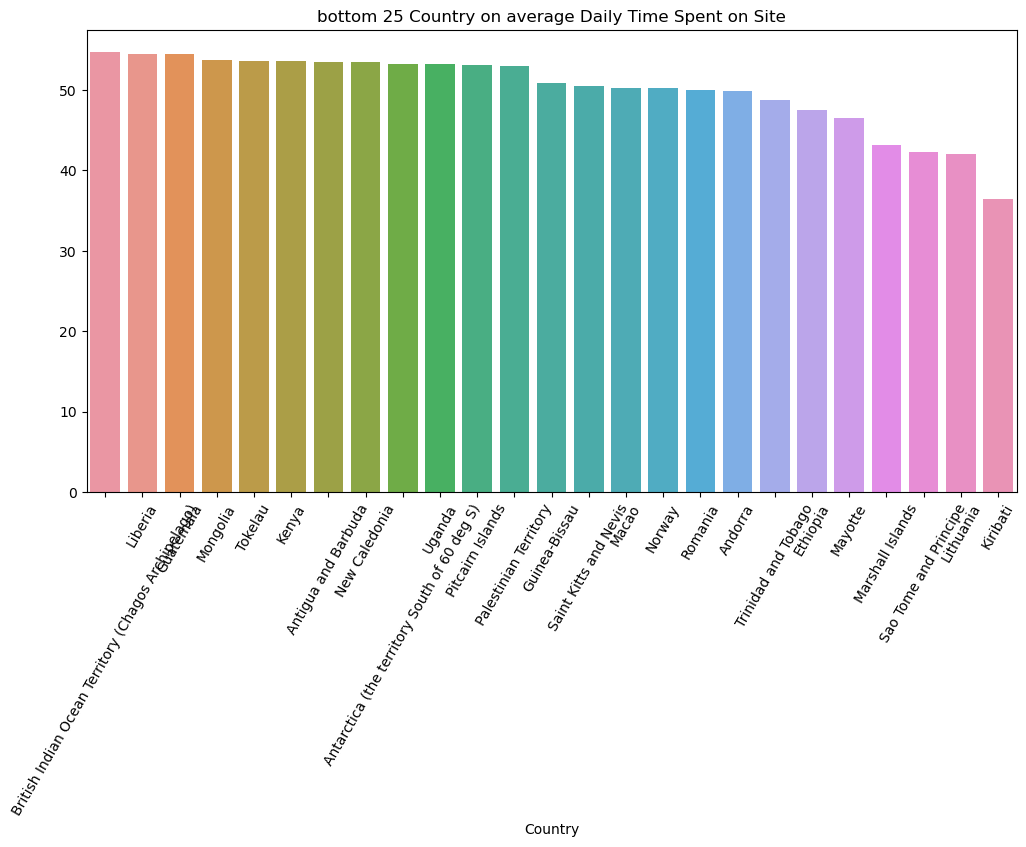

In [26]:
plt.figure(figsize=(12, 6))
xx = df.groupby('Country')['Daily Time Spent on Site'].mean().sort_values(ascending=False )[-25:]
sns.barplot(y = xx.values, x = xx.index)
plt.title('bottom 25 Country on average Daily Time Spent on Site')
plt.xticks(rotation = 60)
plt.show()

#### Check the distribution MalevsFemale of the 7 top Countries on average Daily Time Spent on Site

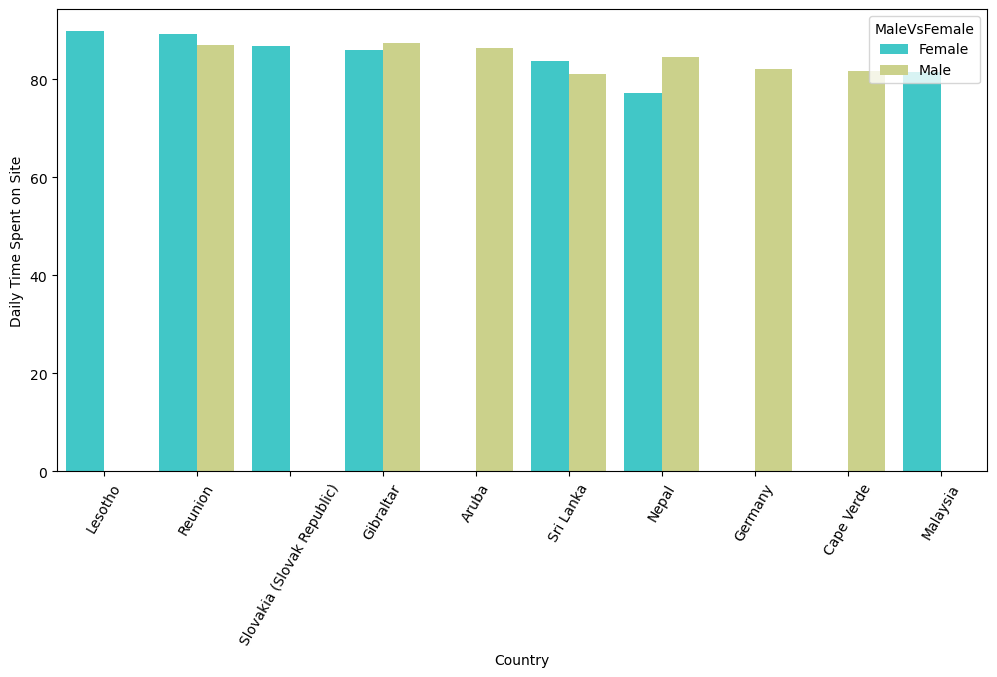

In [27]:
plt.figure(figsize=(12, 6))
countries7 = df.groupby(['Country', 'MaleVsFemale'], as_index=False)['Daily Time Spent on Site'].mean()
sns.barplot(x = 'Country', y = 'Daily Time Spent on Site', data=countries7,
            order = list(df.groupby(['Country'])['Daily Time Spent on Site'].mean().sort_values(ascending=False)[0:10].keys()),
           hue='MaleVsFemale',
           palette='rainbow')
plt.xticks(rotation = 60)
plt.show()

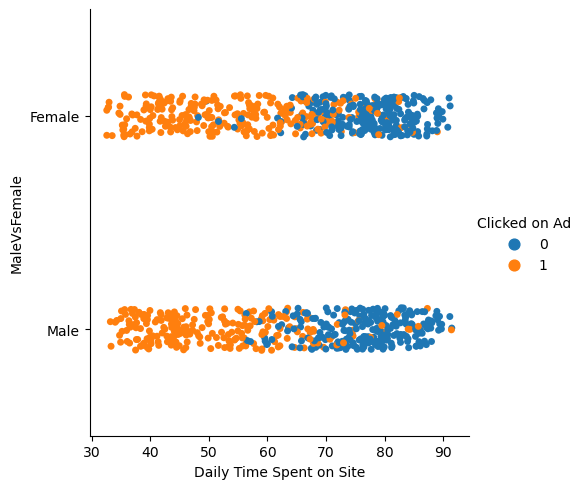

In [28]:
sns.catplot(x = 'Daily Time Spent on Site', y = 'MaleVsFemale', data = df, hue = 'Clicked on Ad')

<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='MaleVsFemale'>

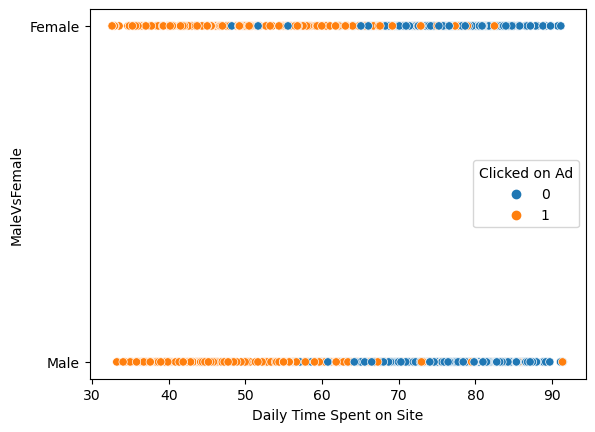

In [29]:
sns.scatterplot(x = 'Daily Time Spent on Site', y = 'MaleVsFemale', data = df, hue = 'Clicked on Ad')

#### What is the average click-through rate on ads in the dataset?

In [30]:
print('Average Click Throught rate on ads is : ',df['Clicked on Ad'].mean())

Average Click Throught rate on ads is :  0.5


#### Which gender clicks on the ad the most?

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

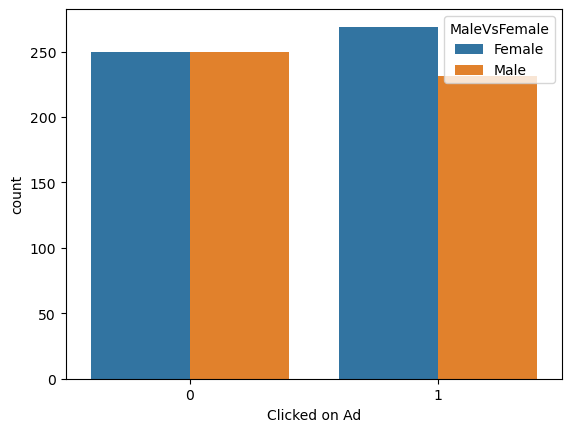

In [31]:
sns.countplot(x = 'Clicked on Ad', data=df, hue = 'MaleVsFemale')

#### Distribution of top 12 country's ad clicks based

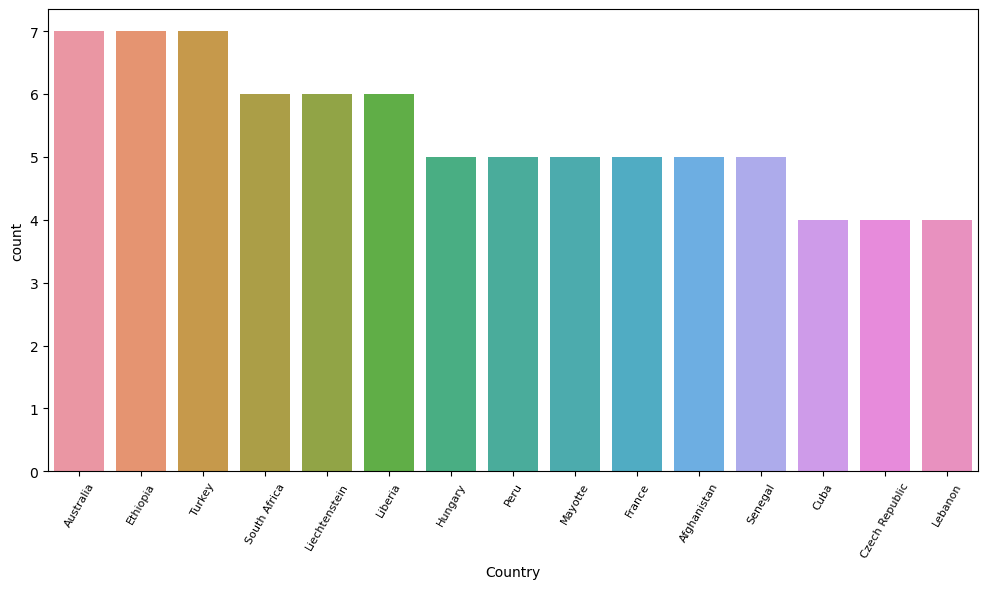

In [32]:
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Country', data = df[df['Clicked on Ad'] == 1],
             order=df[df['Clicked on Ad'] == 1]['Country'].value_counts().index[:15],)
plt.xticks(rotation = 60, fontsize = 8)
plt.show()

#### Distribution of top 12 country's ad clicks based on the sex

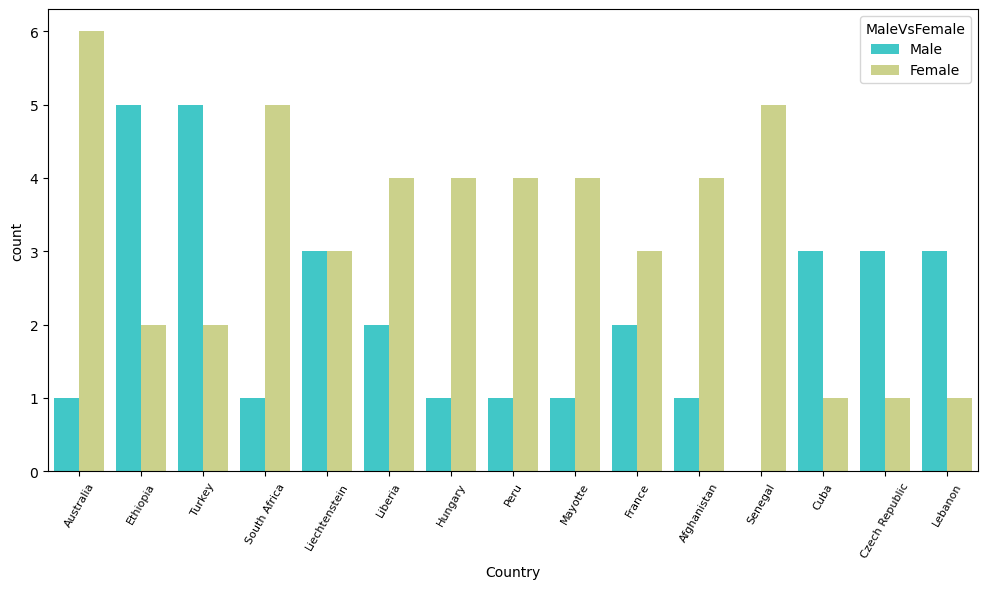

In [33]:
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Country', data = df[df['Clicked on Ad'] == 1],
             order=df[df['Clicked on Ad'] == 1]['Country'].value_counts().index[:15],
             hue = 'MaleVsFemale',
             palette='rainbow')
plt.xticks(rotation = 60, fontsize = 8)
plt.show()

#### Who spends more time 'Daily Internet Usage',online, women or girls?

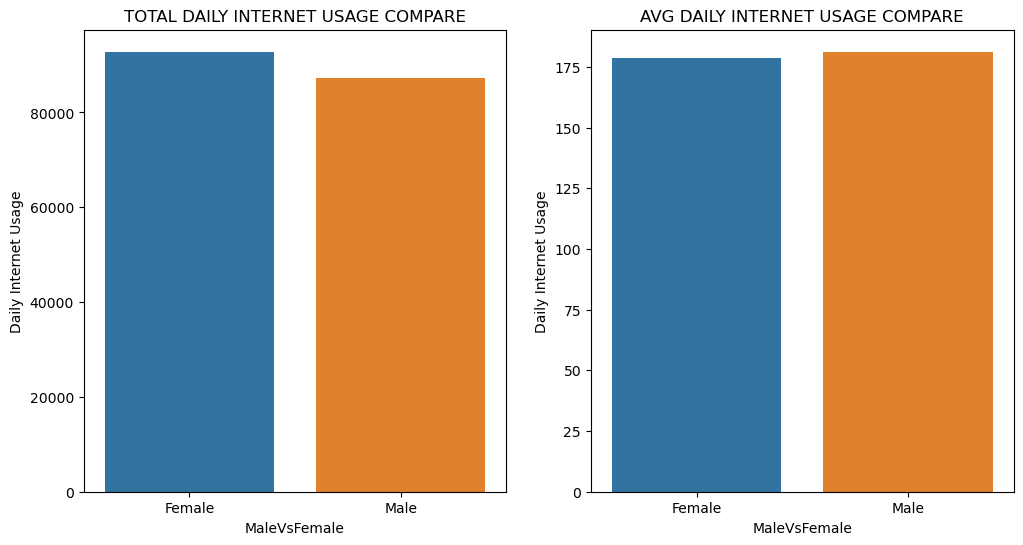

In [34]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.barplot(x = 'MaleVsFemale',y = 'Daily Internet Usage',
              data = df.groupby('MaleVsFemale', as_index=False)['Daily Internet Usage'].sum())
plt.title('TOTAL DAILY INTERNET USAGE COMPARE')
plt.subplot(122)
sns.barplot(x = 'MaleVsFemale',y = 'Daily Internet Usage',
              data = df.groupby('MaleVsFemale', as_index=False)['Daily Internet Usage'].mean())
plt.title('AVG DAILY INTERNET USAGE COMPARE')
plt.show()

In [35]:
df

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad Topic Line            City  Male  \
0       Cloned 5thgeneration orchestration     Wrightburgh     0   
1       Monitored national standardization       West Jodi     1   
2         Organic bottom-line service-desk        Davidton     0   
3    Triple-buffered reciprocal time-frame  West Terrifurt     1   
4            Robust logistical utilization    South Manuel     0   
..                                     ...             ...   ...   
995          Fundamental modular algorithm       Duffystad     1   
996        Grass-roots cohesive monitoring     New Darlene     1   
997           Expanded intangible solution   South Jessica     1   
998   Proactive bandwidth-monitored policy     West Steven     0   
999        Virtual 5thgeneration emulation     Ronniemouth     0   

                    Country            Timestamp  Clicked on Ad MaleVsFemale  
0                   Tunisia  2016-03-27 00:53:11              0       Female  
1                     Nauru  2016-04-04 01:39:02              0         Male  
2                San Marino  2016-03-13 20:35:42              0       Female  
3                     Italy  2016-01-10 02:31:19              0         Male  
4                   Iceland  2016-06-03 03:36:18              0       Female  
..                      ...                  ...            ...          ...  
995                 Lebanon  2016-02-11 21:49:00              1         Male  
996  Bosnia and Herzegovina  2016-04-22 02:07:01              1         Male  
997                Mongolia  2016-02-01 17:24:57              1         Male  
998               Guatemala  2016-03-24 02:35:54              0       Female  
999                  Brazil  2016-06-03 21:43:21              1       Female  

[1000 rows x 11 columns]

### Lets extract a year and day an month and Hour

In [36]:
def Year_(x) :
    return x.split('-')[0]
def Month_(x) :
    return x.split('-')[1]
def Day_(x) :
    return x.split('-')[2].split(' ')[0] 
def Hour_(x) :
    return x.split(':')[0].split(' ')[1]

In [37]:
df['Year']  = df['Timestamp'].apply(Year_)
df['Month'] = df['Timestamp'].apply(Month_)
df['Day']   = df['Timestamp'].apply(Day_)
df['Hour']  = df['Timestamp'].apply(Hour_)
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df['Week'] = df['Timestamp'].apply(lambda time : time.dayofweek)

In [38]:
df

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad Topic Line            City  Male  \
0       Cloned 5thgeneration orchestration     Wrightburgh     0   
1       Monitored national standardization       West Jodi     1   
2         Organic bottom-line service-desk        Davidton     0   
3    Triple-buffered reciprocal time-frame  West Terrifurt     1   
4            Robust logistical utilization    South Manuel     0   
..                                     ...             ...   ...   
995          Fundamental modular algorithm       Duffystad     1   
996        Grass-roots cohesive monitoring     New Darlene     1   
997           Expanded intangible solution   South Jessica     1   
998   Proactive bandwidth-monitored policy     West Steven     0   
999        Virtual 5thgeneration emulation     Ronniemouth     0   

                    Country           Timestamp  Clicked on Ad MaleVsFemale  \
0                   Tunisia 2016-03-27 00:53:11              0       Female   
1                     Nauru 2016-04-04 01:39:02              0         Male   
2                San Marino 2016-03-13 20:35:42              0       Female   
3                     Italy 2016-01-10 02:31:19              0         Male   
4                   Iceland 2016-06-03 03:36:18              0       Female   
..                      ...                 ...            ...          ...   
995                 Lebanon 2016-02-11 21:49:00              1         Male   
996  Bosnia and Herzegovina 2016-04-22 02:07:01              1         Male   
997                Mongolia 2016-02-01 17:24:57              1         Male   
998               Guatemala 2016-03-24 02:35:54              0       Female   
999                  Brazil 2016-06-03 21:43:21              1       Female   

     Year Month Day Hour  Week  
0    2016    03  27   00     6  
1    2016    04  04   01     0  
2    2016    03  13   20     6  
3    2016    01  10   02     6  
4    2016    06  03   03     4  
..    ...   ...  ..  ...   ...  
995  2016    02  11   21     3  
996  2016    04  22   02     4  
997  2016    02  01   17     0  
998  2016    03  24   02     3  
999  2016    06  03   21     4  

[1000 rows x 16 columns]

In [39]:
df.to_csv('data.csv', index=False)

#### Hour Distribution based on ad click ?

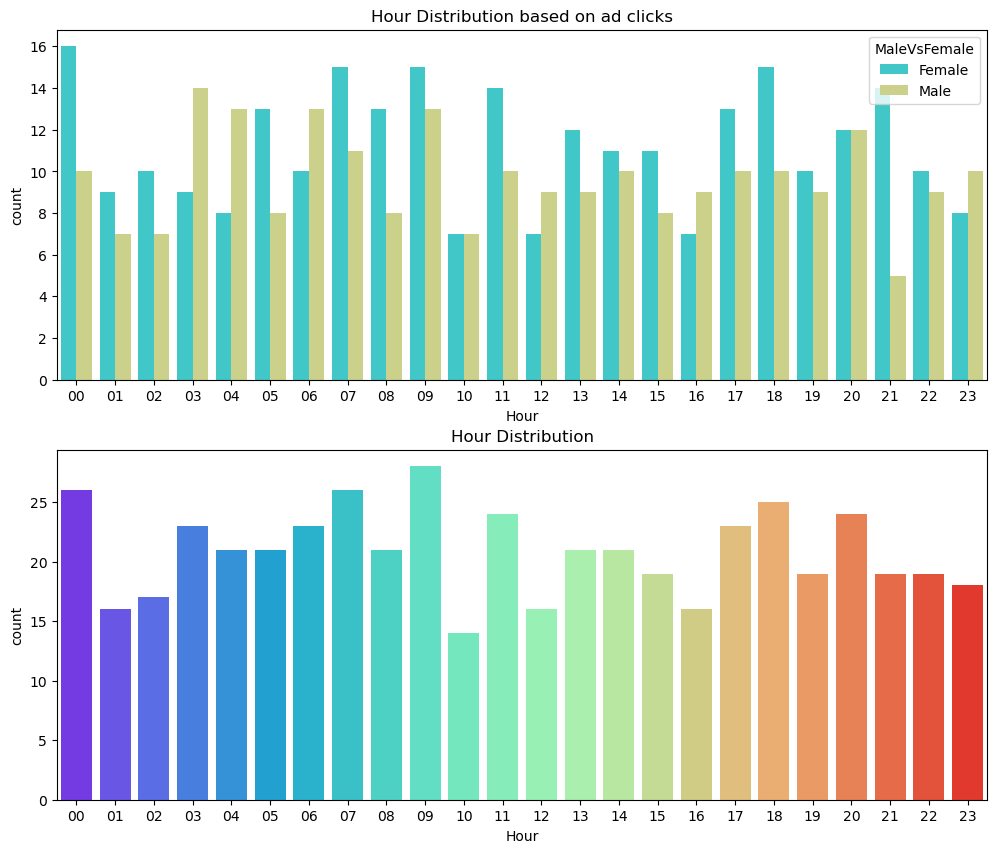

In [40]:
plt.figure(figsize=(12, 10))
plt.subplot(211)
sns.countplot(x = 'Hour', data = df[df['Clicked on Ad']==1].sort_values(by='Hour'),
             hue = 'MaleVsFemale',
             palette='rainbow')
plt.title('Hour Distribution based on ad clicks')
plt.subplot(212)
sns.countplot(x = 'Hour', data = df[df['Clicked on Ad']==1].sort_values(by='Hour'),
             palette='rainbow')
plt.title('Hour Distribution')
plt.show()

#### Month Distribution based on ad click ?

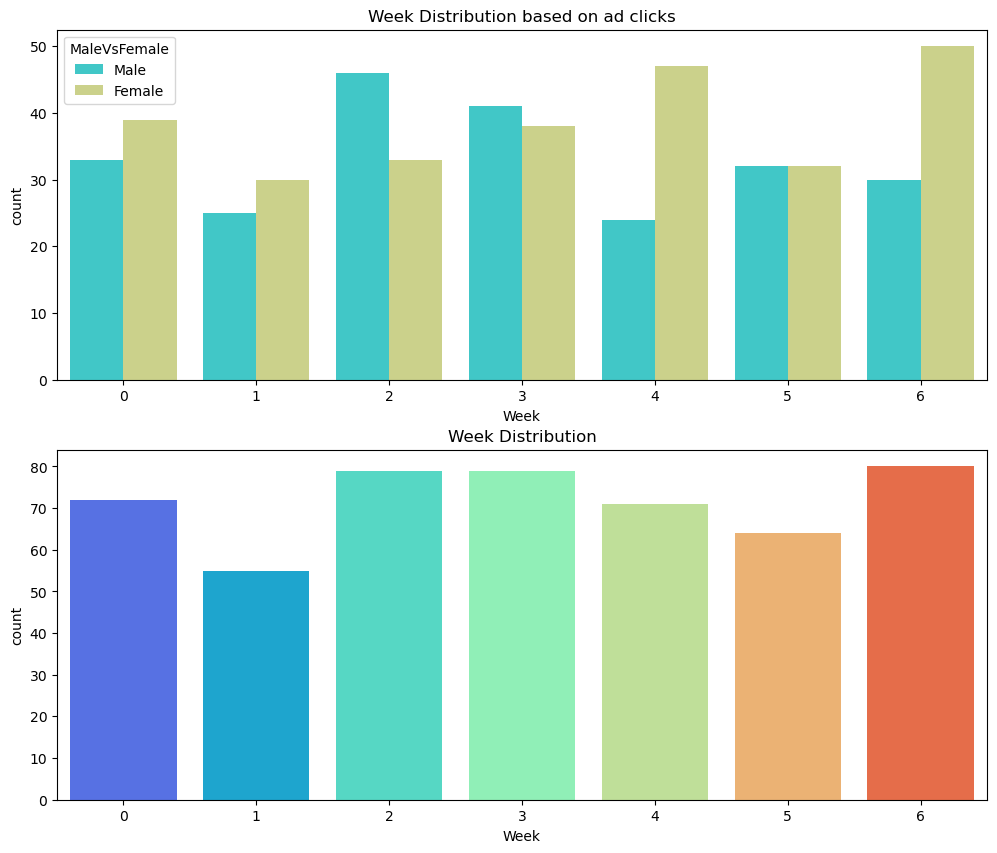

In [41]:
plt.figure(figsize=(12, 10))
plt.subplot(211)
sns.countplot(x = 'Week', data = df[df['Clicked on Ad']==1].sort_values(by='Week'),
             hue = 'MaleVsFemale',
             palette='rainbow')
plt.title('Week Distribution based on ad clicks')
plt.subplot(212)
sns.countplot(x = 'Week', data = df[df['Clicked on Ad']==1].sort_values(by='Week'),
             palette='rainbow')
plt.title('Week Distribution')
plt.show()

#### Month Distribution based on ad click ?

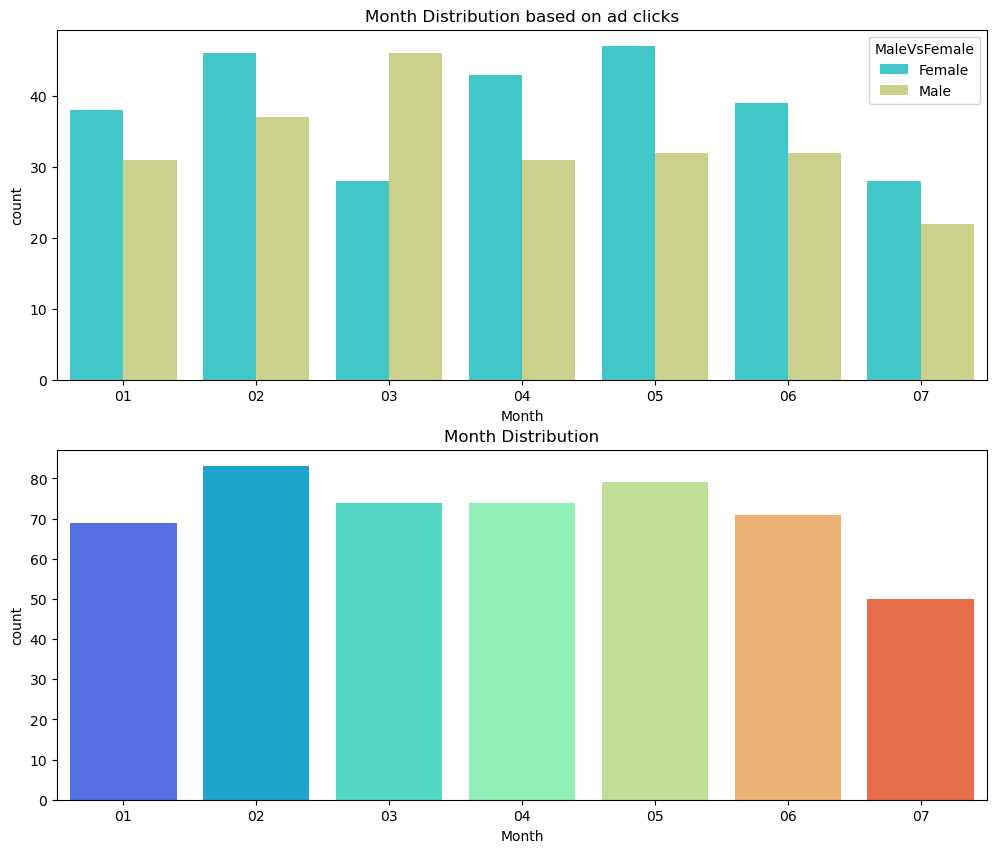

In [42]:
plt.figure(figsize=(12, 10))
plt.subplot(211)
sns.countplot(x = 'Month', data = df[df['Clicked on Ad']==1].sort_values(by='Month'),
             hue = 'MaleVsFemale',
             palette='rainbow')
plt.title('Month Distribution based on ad clicks')
plt.subplot(212)
sns.countplot(x = 'Month', data = df[df['Clicked on Ad']==1].sort_values(by='Month'),
             palette='rainbow')
plt.title('Month Distribution')
plt.show()

#### Day Distribution based on ad click ?

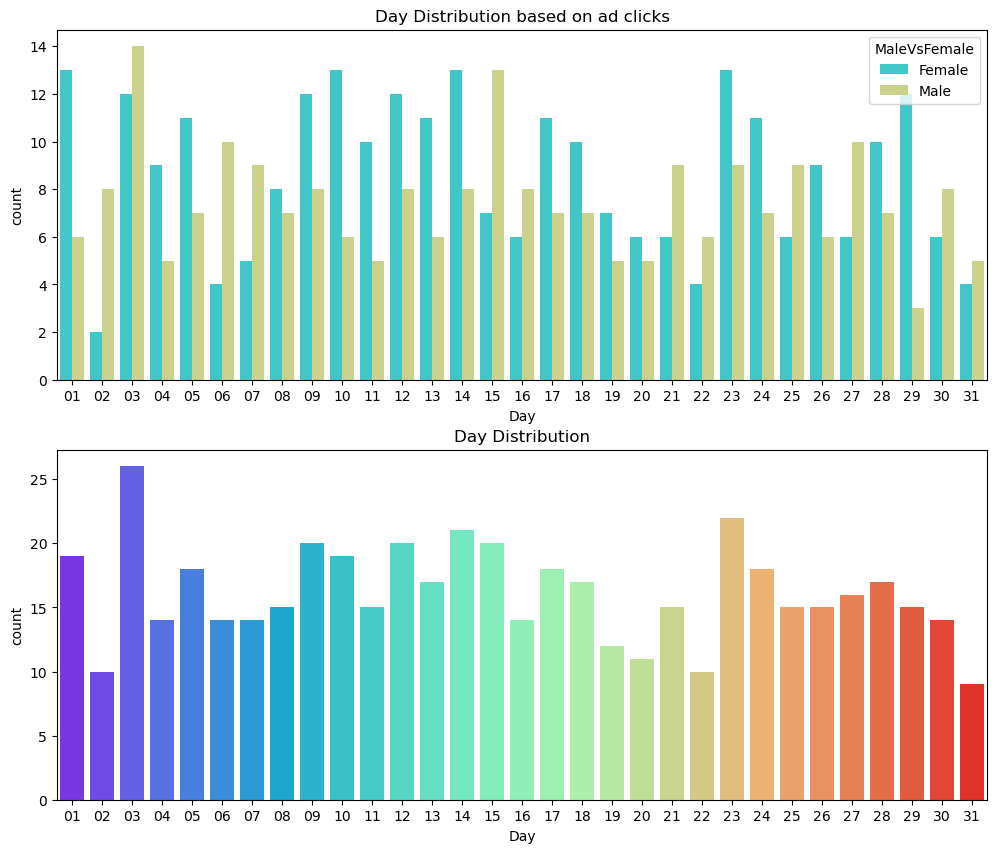

In [43]:
plt.figure(figsize=(12, 10))
plt.subplot(211)
sns.countplot(x = 'Day', data = df[df['Clicked on Ad']==1].sort_values(by='Day'),
             hue = 'MaleVsFemale',
             palette='rainbow')
plt.title('Day Distribution based on ad clicks')
plt.subplot(212)
sns.countplot(x = 'Day', data = df[df['Clicked on Ad']==1].sort_values(by='Day'),
             palette='rainbow')
plt.title('Day Distribution')
plt.show()

In [44]:
# check the evolution of ad on click during date
df['Date'] = df['Timestamp'].apply(lambda t : t.date())

In [45]:
df_click1 = df[df['Clicked on Ad'] == 1].groupby('Date').count()['Clicked on Ad'].reset_index()
fig = px.line(df_click1, 
             x = 'Date', y='Clicked on Ad',
             title='Number of clicks on ads by date Distribution')
fig.show()

### Atack Model de l'intelligence Artificielle

#### Data Wrangling

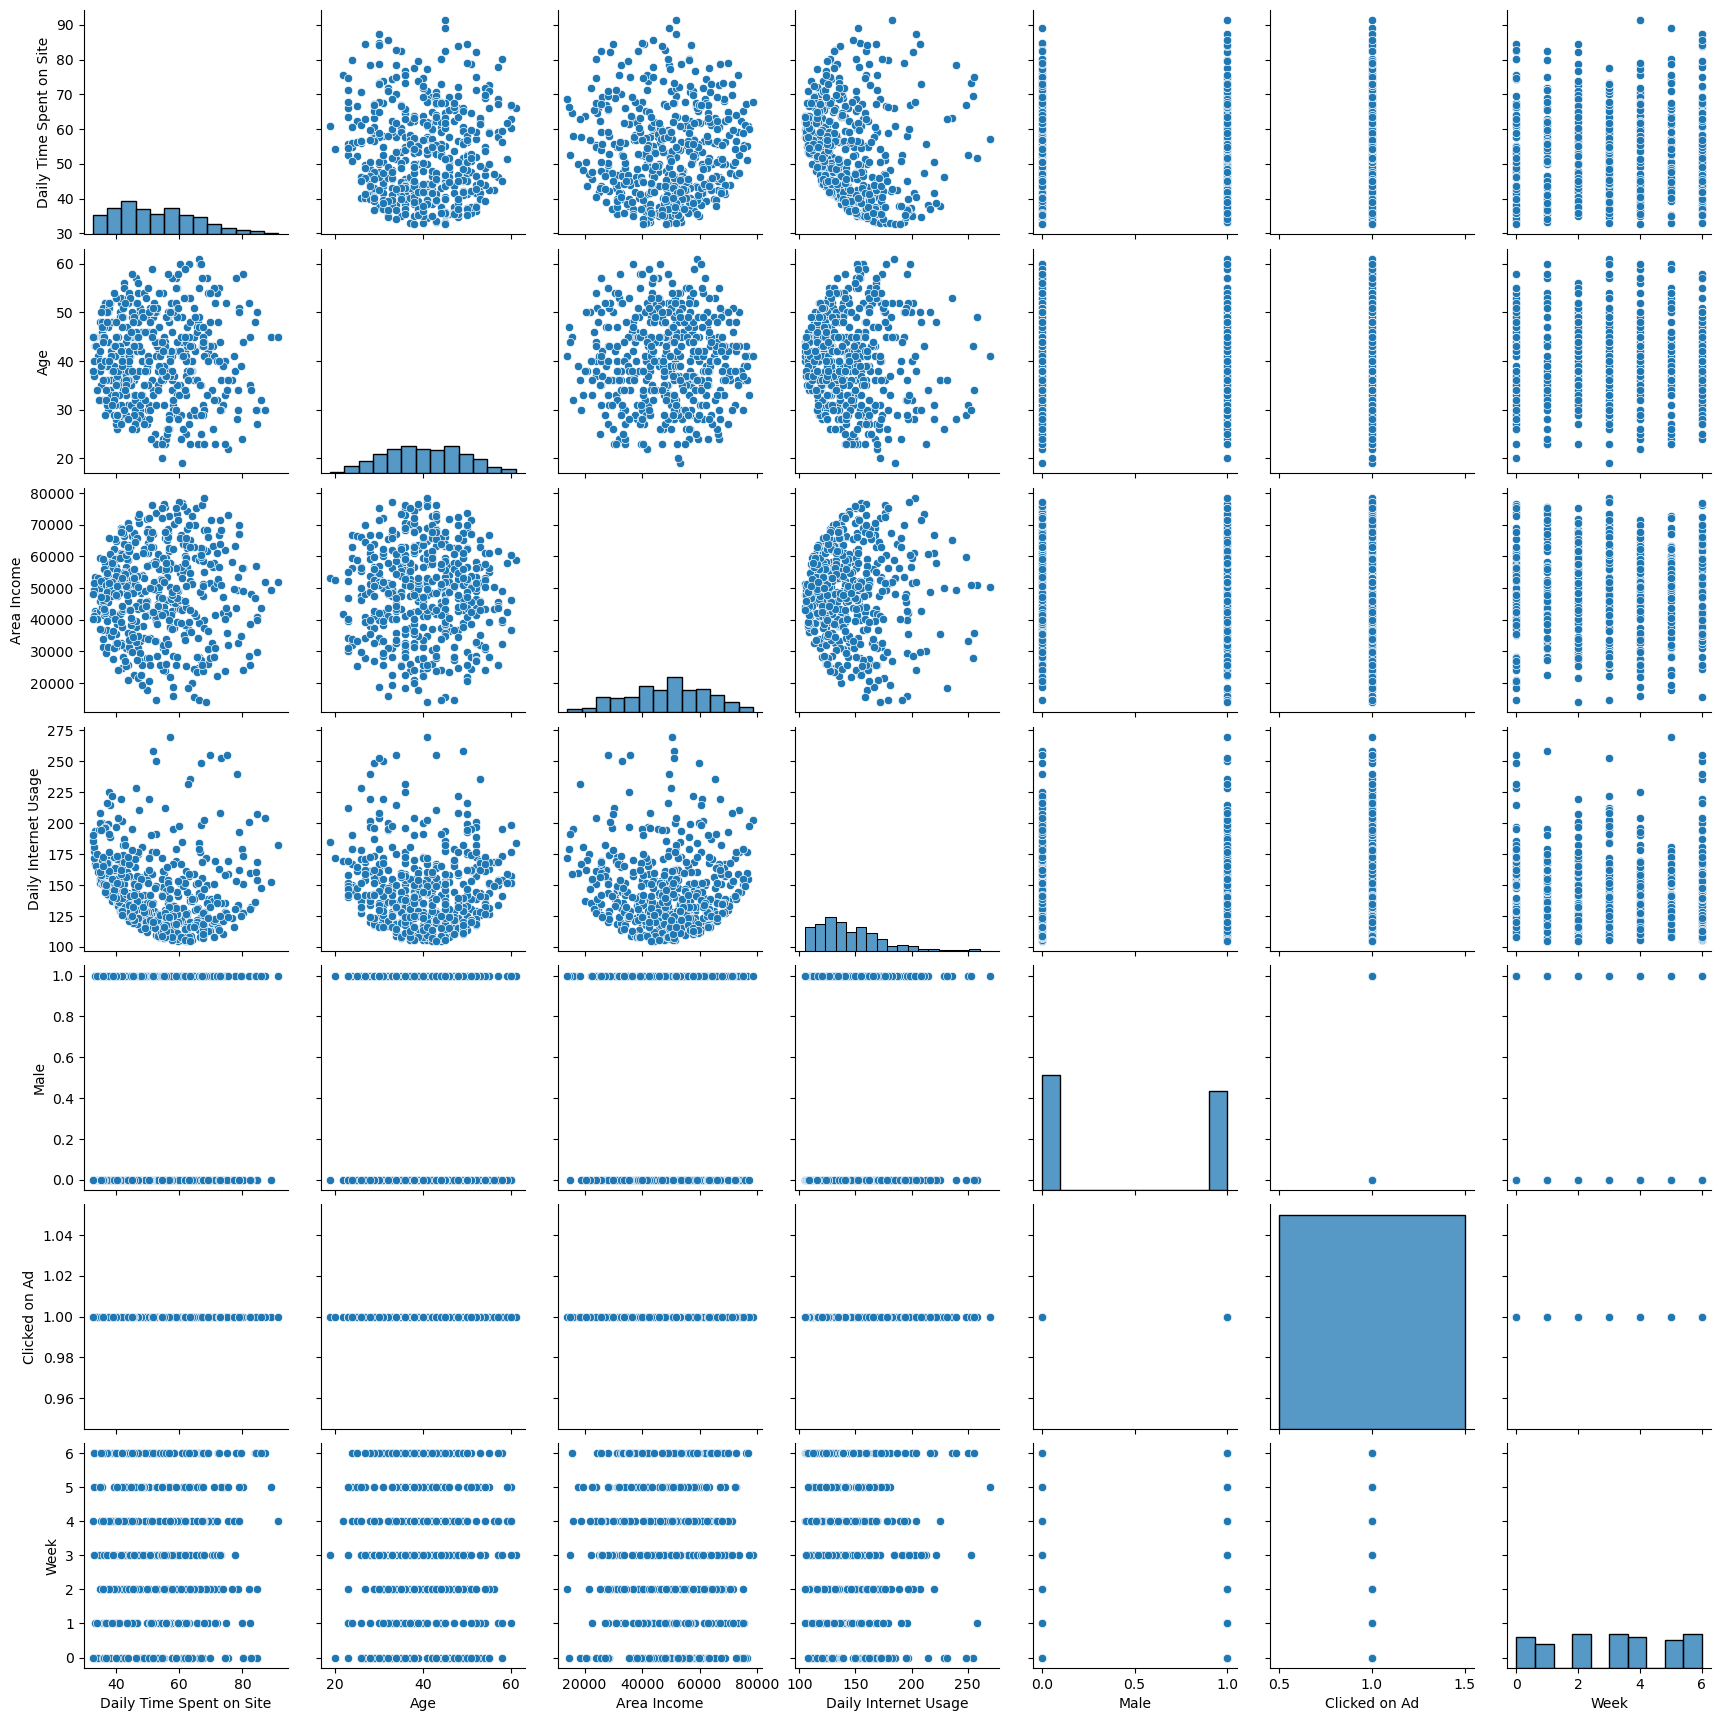

In [46]:
sns.pairplot(df[df['Clicked on Ad'] == 1])

In [47]:
# Select all columns
for i, j in enumerate(df.columns) :
    print(f"columns {i:-<45} : {j}")

columns 0-------------------------------------------- : Daily Time Spent on Site
columns 1-------------------------------------------- : Age
columns 2-------------------------------------------- : Area Income
columns 3-------------------------------------------- : Daily Internet Usage
columns 4-------------------------------------------- : Ad Topic Line
columns 5-------------------------------------------- : City
columns 6-------------------------------------------- : Male
columns 7-------------------------------------------- : Country
columns 8-------------------------------------------- : Timestamp
columns 9-------------------------------------------- : Clicked on Ad
columns 10------------------------------------------- : MaleVsFemale
columns 11------------------------------------------- : Year
columns 12------------------------------------------- : Month
columns 13------------------------------------------- : Day
columns 14------------------------------------------- : Hour
columns 1

In [48]:
dff = df.drop(['Date', 'Timestamp', 'Ad Topic Line'], axis = 1)

In [49]:
dff = pd.get_dummies(dff)
dff.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Clicked on Ad', 'Week',
       'City_Adamsbury', 'City_Adamside', 'City_Adamsstad',
       ...
       'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19',
       'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23'],
      dtype='object', length=1278)

In [50]:
#### Import Machine Learning Libraries
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors    import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree         import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import RobustScaler
from sklearn.metrics         import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score, ShuffleSplit, validation_curve, GridSearchCV

In [51]:
#### Split data into 70% for training and 30% for testing
#### split data_testing into 50% for validation
x_train, x_test, y_train, y_test = train_test_split(dff.drop('Clicked on Ad', axis = 1), dff['Clicked on Ad'], test_size=0.3, random_state=10)

In [52]:
x_test, x_val, y_test, y_val = train_test_split(x_train, y_train, test_size=0.5, random_state=10)

In [53]:
x_train = x_train.to_numpy('float32')
x_test  = x_test.to_numpy('float32')
x_cal   = x_val.to_numpy('float32')

In [54]:
models = {
    'Logistic'     : LogisticRegression(),
    'KNeighbors'   : KNeighborsClassifier(),
    'DecisionTree' : DecisionTreeClassifier(),
    'SVM'          : SVC()
}

In [55]:
for i, j in models.items() :
    model = j.fit(x_train, y_train)
    print(f"{i.center(45, '-')}")
    print(f"Test Score for {i} est {model.score(x_test, y_test)}")
    print(f"Validation Score for {i} est {model.score(x_val, y_val)}")
    print('------------------------------------------------------------')

-------------------Logistic------------------
Test Score for Logistic est 0.8971428571428571
Validation Score for Logistic est 0.9057142857142857
------------------------------------------------------------
------------------KNeighbors-----------------
Test Score for KNeighbors est 0.7971428571428572
Validation Score for KNeighbors est 0.8285714285714286
------------------------------------------------------------
-----------------DecisionTree----------------
Test Score for DecisionTree est 1.0
Validation Score for DecisionTree est 1.0
------------------------------------------------------------
---------------------SVM---------------------
Test Score for SVM est 0.6828571428571428
Validation Score for SVM est 0.74
------------------------------------------------------------


In [56]:
## Cross validation--Confirmation
def test_cross(models, x, y) :
    for i, j in models.items() :
        plt.figure()
        crosss_val = cross_val_score(j, x, y, cv = 7, scoring='f1_macro')
        plt.plot(range(1,8),list(crosss_val))
        plt.title(f"{i.center(18,'-')}")
    plt.show()

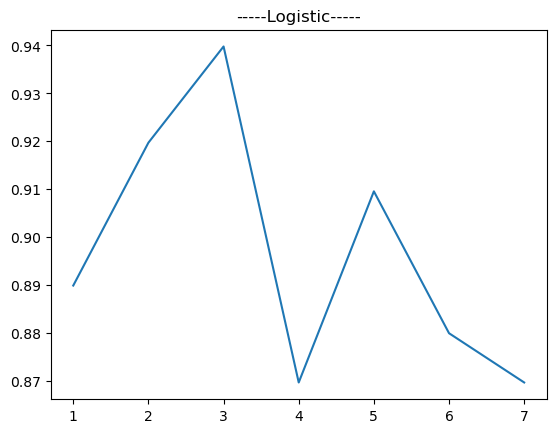

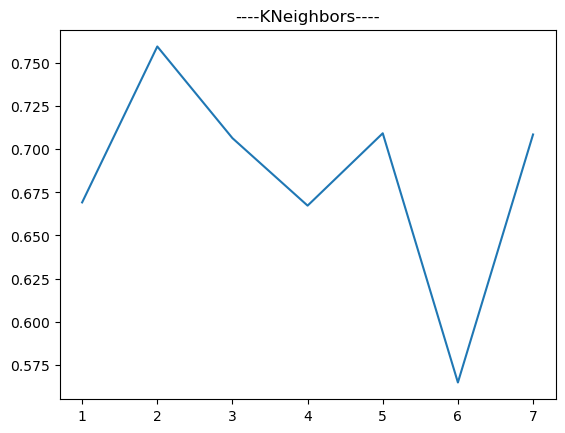

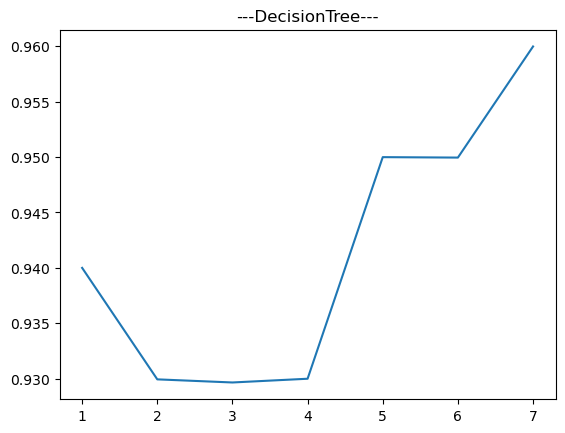

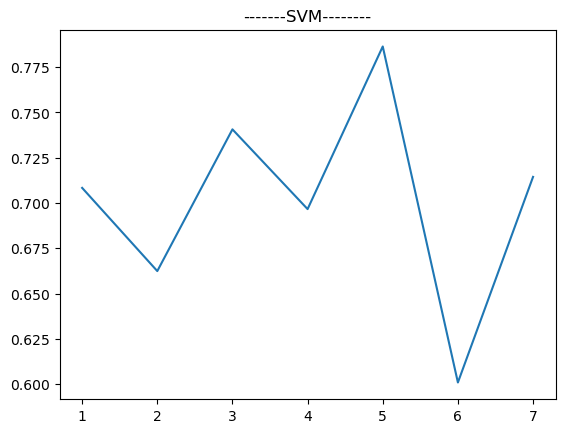

In [57]:
test_cross(models, x_train, y_train)

### Cross validation

In [58]:
## Cross validation--Confirmation
def test_cross_shuffle(models, x, y) :
    for i, j in models.items() :
        plt.figure()
        n_samples = dff.shape[0]
        cv = ShuffleSplit(n_splits=7, test_size=0.3, random_state=0)
        crosss_val = cross_val_score(j, x, y, cv = cv, scoring='f1_macro')
        plt.plot(range(1,8),list(crosss_val))
        plt.title(f"{i.center(18,'-')}")
    plt.show()

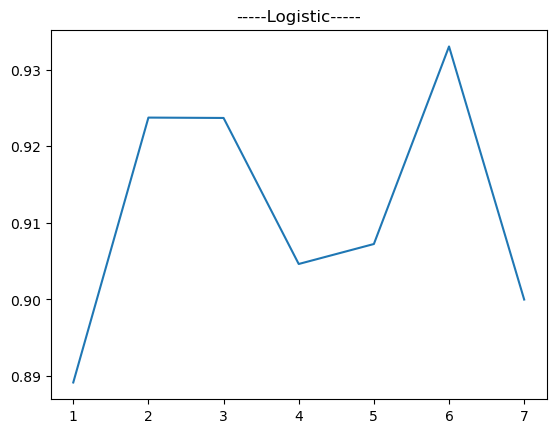

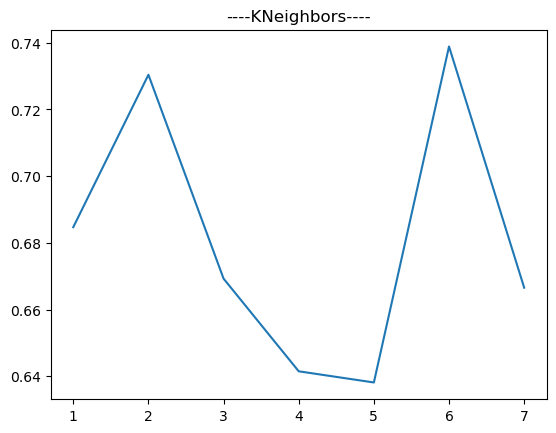

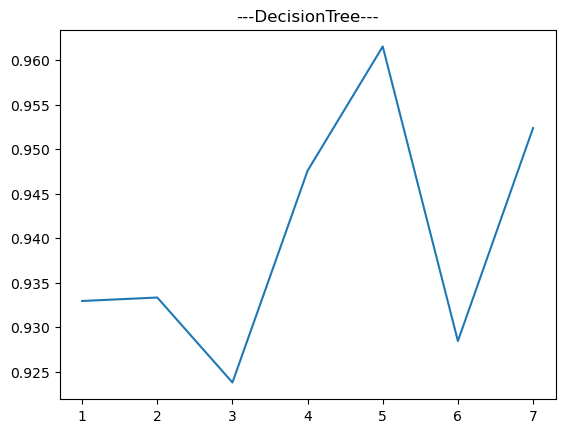

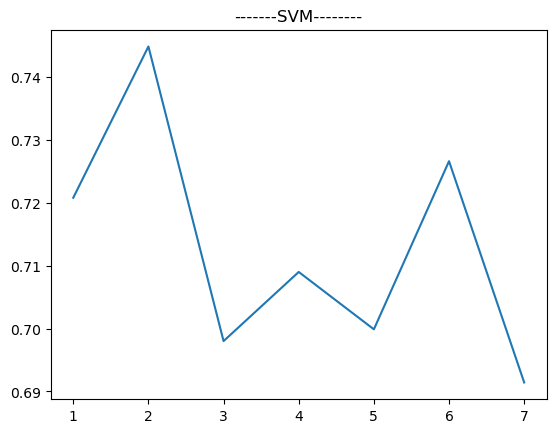

In [59]:
test_cross_shuffle(models, x_train, y_train)

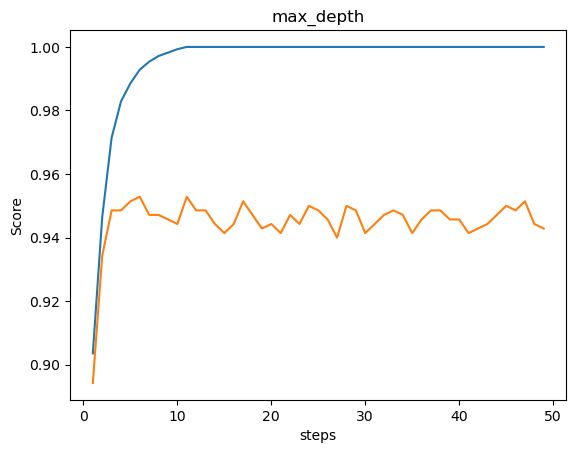

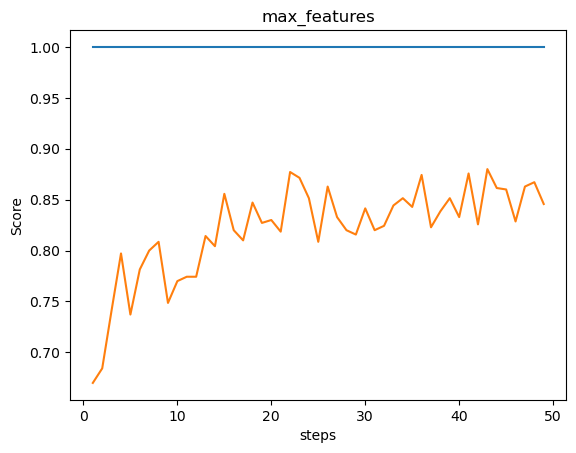

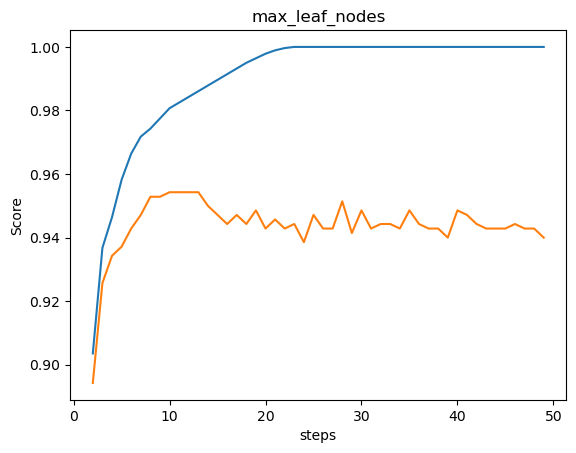

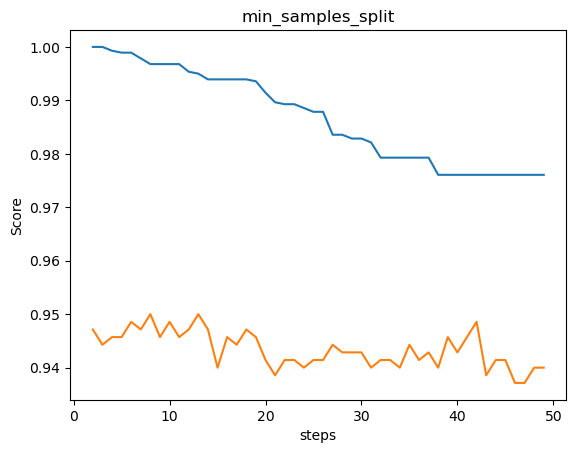

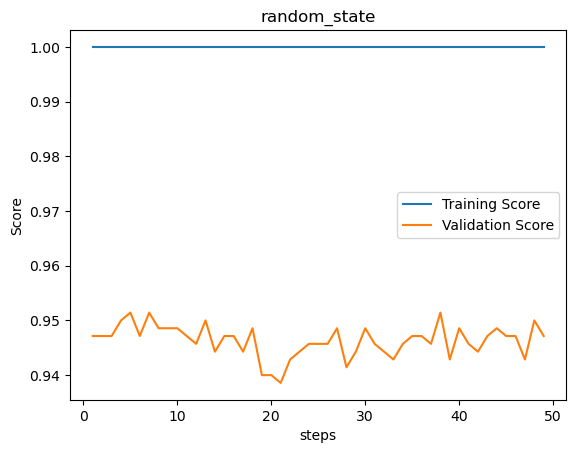

In [60]:
liste_hyper = [ 'max_depth', 'max_features', 'max_leaf_nodes', 'min_samples_split', 'random_state']
for i in liste_hyper :
    train_scores, valid_scores = validation_curve(DecisionTreeClassifier(), x_train, y_train,
                                                  param_name=i ,param_range=np.arange(1, 50), cv = 5)
    plt.figure()
    plt.plot(np.arange(1, 50), train_scores.mean(axis = 1), label = 'Training Score')
    plt.plot(np.arange(1, 50), valid_scores.mean(axis = 1), label = 'Validation Score')
    plt.xlabel('steps')
    plt.ylabel('Score')
    plt.title(f"{i}")
plt.legend()
plt.show()

### GridSearchCv

In [61]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_leaf_nodes': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'random_state': [10, 20, 30, 40]
}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid, cv=5, scoring='accuracy').fit(x_train, y_train)

In [62]:
grid.best_score_

0.9557142857142857

In [63]:
grid.score(x_test, y_test)

0.9657142857142857

In [64]:
grid.score(x_val, y_val)

0.9857142857142858

In [65]:
model = grid.best_estimator_

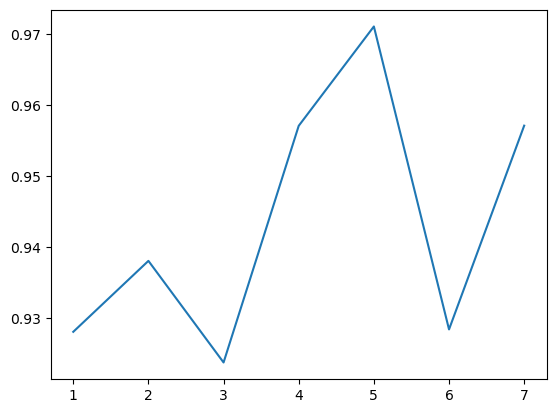

In [66]:
n_samples = dff.shape[0]
cv = ShuffleSplit(n_splits=7, test_size=0.3, random_state=0)
crosss_val = cross_val_score(model, x_train, y_train, cv = cv, scoring='f1_macro')
plt.plot(range(1,8),list(crosss_val))

<AxesSubplot:>

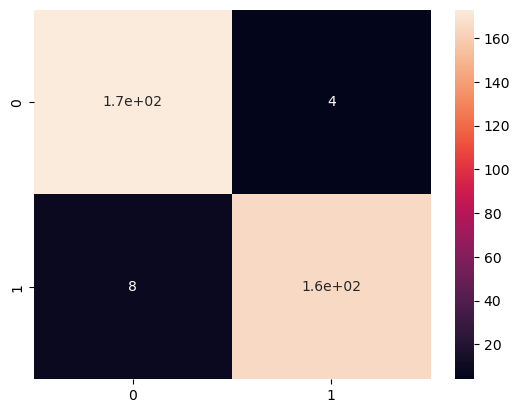

In [67]:
sns.heatmap(confusion_matrix(y_test, model.predict(x_test)), annot=True)

In [68]:
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       177
           1       0.98      0.95      0.96       173

    accuracy                           0.97       350
   macro avg       0.97      0.97      0.97       350
weighted avg       0.97      0.97      0.97       350



## Good Luck